In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import time 

In [33]:
## data import and cleaning 
data = pd.read_excel("O:/pricing/Average Spreads/02052019_Current_Pricing_Data.xlsx")
data = data[data['overrideType'] == "A"]
df = data
df = pd.concat([df['cusip'],df['class'],df['wal'],df['ratingOrdinal'],df['swapspread']],axis = 1)
df.head()

## convert categorical data into dummy variable 
df = pd.get_dummies(df, columns=['class'])


## drop columns doesnt matter 
target = df['swapspread']
variables = df.drop(columns = 'swapspread')

## cleaning & scaling (normalize)
from sklearn.preprocessing import normalize
variables = variables.set_index('cusip')
variables = variables.dropna()
cusip = variables.index
variables = normalize(variables)
variables[:5]

array([[0.        , 0.99995   , 0.        , 0.        , 0.        ,
        0.        , 0.0099995 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.009999  , 0.99990001, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.009999  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
   

In [29]:
#final_centroids, final_cluster_assignment

seed=000000, heterogeneity=386.45972
seed=020000, heterogeneity=386.45972
seed=040000, heterogeneity=386.45972
seed=060000, heterogeneity=386.45972
seed=080000, heterogeneity=386.45972
seed=100000, heterogeneity=386.45972
seed=120000, heterogeneity=386.45972
seed=000000, heterogeneity=183.87770
seed=020000, heterogeneity=161.89208
seed=040000, heterogeneity=159.34157
seed=060000, heterogeneity=150.31168
seed=080000, heterogeneity=171.62800
seed=100000, heterogeneity=132.24140
seed=120000, heterogeneity=133.98515
seed=000000, heterogeneity=69.15438
seed=020000, heterogeneity=77.54334
seed=040000, heterogeneity=65.64864
seed=060000, heterogeneity=75.77837
seed=080000, heterogeneity=72.26645
seed=100000, heterogeneity=72.81816
seed=120000, heterogeneity=58.89642
seed=000000, heterogeneity=35.38157
seed=020000, heterogeneity=26.71428
seed=040000, heterogeneity=25.50168
seed=060000, heterogeneity=26.74125
seed=080000, heterogeneity=30.86361
seed=100000, heterogeneity=39.21828
seed=120000, h

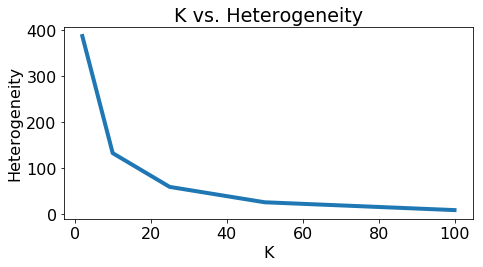

In [30]:
##################### best k ###############################
import sys
start = time.time()
centroids = {}
cluster_assignment = {}
heterogeneity_values = []
k_list = [2, 10, 25, 50, 100]
seed_list = [0, 20000, 40000, 60000, 80000, 100000, 120000]

for k in k_list:
    heterogeneity = []
    centroids[k], cluster_assignment[k] = kmeans_multiple_runs(variables, k, maxiter=400,
                                                               num_runs=len(seed_list),
                                                               seed_list=seed_list,
                                                               verbose=True)
    score = compute_heterogeneity(variables, k, centroids[k], cluster_assignment[k])
    heterogeneity_values.append(score)

plot_k_vs_heterogeneity(k_list, heterogeneity_values)

end = time.time()
print(end-start)


In [31]:
### multiple runs 
## smart kmean ++ 
##  num_runs: how many random see we are using to initialze the model 
num_runs = 7
maxiter = 400
k = 10
final_centroids, final_cluster_assignment = kmeans_multiple_runs(variables, k, maxiter ,
                                                                 num_runs, seed_list, verbose=False)


final = pd.DataFrame(final_cluster_assignment)
cusip = pd.DataFrame(cusip)
res = pd.concat([cusip,final],axis = 1)
res.head()

,cusip,0
0,00215MAC6,1
1,00215MAE2,1
2,00215MAG7,1
3,00215MAJ1,1
4,00215MAL6,1


In [8]:
def tranform_data_into_category(data):
    for x in data.columns:
        data = pd.get_dummies(data, columns=[x])
    return data

In [9]:
def get_initial_centroids(data, k, seed=None):
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    n = data.shape[0] # number of data points
        
    # Pick K indices from range [0, N).
    rand_indices = np.random.randint(0, n, k)
    # apply k to centruids 
    centroids = np.array(data[rand_indices,:])
    
    return centroids

In [10]:
def assign_clusters(data, centroids):
    
    # Compute distances between each data point and the set of centroids
    distances_from_centroids = pairwise_distances(data, centroids, metric='euclidean')
    
    # Compute cluster assignments for each data point:
    cluster_assignment = np.argmin(distances_from_centroids, axis=1)
    
    return cluster_assignment

In [11]:
def centroids_remove_nan(centroids):
    centroids = pd.DataFrame(centroids)
    centroids = centroids.dropna()
    centroids = np.array(centroids)
    return centroids

In [12]:
def revise_centroids(data, k, cluster_assignment):
    new_centroids = []
    for i in range(k):
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i]
        # Compute the mean of the data points. Fill in the blank (RHS only)
        centroid = member_data_points.mean(axis=0)
        
        # Convert numpy.matrix type to numpy.ndarray type
        centroid = np.array(centroid)
        #print(centroid)
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)
    new_centroids = centroids_remove_nan(new_centroids)
    return new_centroids

In [13]:
def compute_heterogeneity(data, k, centroids, cluster_assignment):
    
    heterogeneity = 0.0
    for i in range(k):
        
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i, :]
        
        if member_data_points.shape[0] > 0: # check if i-th cluster is non-empty
            # Compute distances from centroid to data points (RHS only)
            distances = pairwise_distances(member_data_points, [centroids[i]], metric='euclidean')
            squared_distances = distances**2
            heterogeneity += np.sum(squared_distances)
        
    return heterogeneity

In [14]:
# Fill in the blanks
def kmeans(data, k, initial_centroids, maxiter, record_heterogeneity=None, verbose=False):

    centroids = initial_centroids[:]
    prev_cluster_assignment = None

    for itr in range(maxiter):        
        if verbose:
            print(itr)

        # 1. Make cluster assignments using nearest centroids
        # YOUR CODE HERE
        cluster_assignment = assign_clusters(data, centroids)

        # 2. Compute a new centroid for each of the k clusters,
        #averaging all data points assigned to that cluster. 
        centroids = revise_centroids(data, k, cluster_assignment)

        # Check for convergence: if none of the assignments changed, stop
        if prev_cluster_assignment is not None and \
          (prev_cluster_assignment==cluster_assignment).all():
            break

        # Print number of new assignments 
        if prev_cluster_assignment is not None:
            num_changed = sum(abs(prev_cluster_assignment-cluster_assignment))
            if verbose:
                print('    {0:5d} elements changed their cluster assignment.'.format(num_changed))   

        # Record heterogeneity convergence metric
        if record_heterogeneity is not None:
            # YOUR CODE HERE
            score = compute_heterogeneity(data, k, centroids, cluster_assignment)
            record_heterogeneity.append(score)

        prev_cluster_assignment = cluster_assignment[:]
    #plot_heterogeneity( record_heterogeneity, k)
    return centroids, cluster_assignment

In [15]:
def plot_heterogeneity(heterogeneity, k):
    plt.figure(figsize=(7,4))
    plt.plot(heterogeneity, linewidth=4)
    plt.xlabel('# Iterations')
    plt.ylabel('Heterogeneity')
    plt.title('Heterogeneity of clustering over time, K={0:d}'.format(k))
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [16]:
def smart_initialize(data, k, seed=None):
    '''Use k-means++ to initialize a good set of centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    centroids = np.zeros((k, data.shape[1]))
    
    # Randomly choose the first centroid.
    # Since we have no prior knowledge, choose uniformly at random
    idx = np.random.randint(data.shape[0])
    centroids[0] = data[idx,:]
    # Compute distances from the first centroid chosen to all the other data points
    distances = pairwise_distances(data, centroids[0:1], metric='euclidean').flatten()
    
    for i in range(1, k):
        # Choose the next centroid randomly, so that the probability for each data point to be chosen
        # is directly proportional to its squared distance from the nearest centroid.
        # Roughtly speaking, a new centroid should be as far as from ohter centroids as possible.
        idx = np.random.choice(data.shape[0], 1, p=distances/sum(distances))
        centroids[i] = data[idx,:]
        # Now compute distances from the centroids to all data points
        # leave the data which gives you the nearest distance 
        distances = np.min(pairwise_distances(data, centroids[0:i+1], metric='euclidean'),axis=1)
    
    return centroids

In [17]:
def kmeans_multiple_runs(data, k, maxiter, num_runs, seed_list=None, verbose=False):
    heterogeneity = {}
    
    min_heterogeneity_achieved = float('inf')
    best_seed = None
    final_centroids = None
    final_cluster_assignment = None
    
    for i in range(num_runs):
        
        # Use time if no seeds are provided 
        if seed_list is not None: 
            seed = seed_list[i]
            np.random.seed(seed)
        else: 
            seed = int(time.time())
            np.random.seed(seed)
        
        # Use k-means++ initialization
        initial_centroids = smart_initialize(data, k, seed=seed)
        
        # Run k-means
        centroids, cluster_assignment = kmeans(data, k, initial_centroids, maxiter=400,
                                               record_heterogeneity=None, verbose=False)
        
        # To save time, compute heterogeneity only once in the end
        heterogeneity[seed] = compute_heterogeneity(data, k, centroids, cluster_assignment)
        
        if verbose:
            print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
            sys.stdout.flush()
        
        # if current measurement of heterogeneity is lower than previously seen,
        # update the minimum record of heterogeneity.
        if heterogeneity[seed] < min_heterogeneity_achieved:
            min_heterogeneity_achieved = heterogeneity[seed]
            best_seed = seed
            final_centroids = centroids
            final_cluster_assignment = cluster_assignment
    
    # Return the centroids and cluster assignments that minimize heterogeneity.
    return final_centroids, final_cluster_assignment

In [18]:
def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [19]:
## examples
## rows stands for one instance , 
## columns stands for one feature 
## when we calculate the distance, we calculate the distrances based on the columns 
## after calculation, each instance should have one  distances for each centroids
#np.sqrt(((data2[1] - data)**2).sum(axis = 1)) --- this is how the pairwise implement 

"""data = np.array([[1., 2., 0.],
                 [0., 0., 0.],
                 [2., 2., 0.]])
data2= np.array([[0.5, 0.5, 0.],
                      [0., -0.5, 0.]])
k = 2"""
#cluster_assignment = assign_clusters(data, centroids)
#centroids = revise_centroids(data, k, cluster_assignment)
#score = compute_heterogeneity(data, k, centroids, cluster_assignment)


In [ ]:
## 

In [ ]:
## single examples show you how to use the fucntion 

In [ ]:
## single examples here 
k = 3
heterogeneity = []
initial_centroids = get_initial_centroids(variables, k, seed=0)
centroids, cluster_assignment= kmeans(variables, k, initial_centroids, maxiter=400,
                                       record_heterogeneity=heterogeneity, verbose=True)
#plot_heterogeneity(record_heterogeneity , k)




###################### local maximum solution -- generate more intitial points 
k = 10
heterogeneity = {}
cluster_assignment_dict = {}
import time
import  sys
start = time.time()
tf_idf = variables
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = get_initial_centroids(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    cluster_assignment_dict[seed] = np.bincount(cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}, cluster_distribution={2}'.format(seed, heterogeneity[seed], 
                                           cluster_assignment_dict[seed]))
    sys.stdout.flush()
#end = time.time()
#print(end-start)





##################### smart start knn #############
# keep the distance among the initial point as far as possible 
k = 10
heterogeneity_smart = {}
start = time.time()
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = smart_initialize(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity_smart[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity_smart[seed]))
    sys.stdout.flush()
end = time.time()
print(end-start)

plt.figure(figsize=(8,5))
plt.boxplot([list(heterogeneity.values()), list(heterogeneity_smart.values())], vert=False)
plt.yticks([1, 2], ['k-means', 'k-means++'])
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
